# NBE-E4260 Genesis and Analysis of Brain Signals 2023
Matias Palva, Vladislav Myrov, Joonas Juvonen, Merlin Dumeur, Joona Repo

# Exercise B, deadline on Wednesday 15.02.2023 23:59:00

In [2]:
# Import necessary libraries
import sys
import scipy

import numpy as np
import matplotlib.pyplot as plt

from scipy import signal

## 1. Implement a single-node Kuramoto model. (bonus task worth 2 bonus points)

During this exercise you will need to implement a basic Kuramoto model described in lecture 4.
Dynamics of the model is described via single equation:

$$\newline\newline\frac{d \theta_i}{dt} = \omega + \frac{1}{N} \sum sin(\theta_j - \theta_i) + \varepsilon, \quad \varepsilon \sim \mathcal{N}(0, scale)$$

where $\theta$ is the phase of an oscillator and $\omega$ is its central frequency, $N(0,scale)$ is Gaussian noise with a given scale. Oscillator frequencies are defined as linearly spaced values in range of $[F - spread; F + spread]$ where $F$ is a central frequency of a model and $spread$ is a value that indicates how wide is it.

For this task you can use regular numeric simulations, don't forget to normalize model steps on sampling frequency! Run a short simulation with your model with 3 different coupling values, plot the results, and attach to the report.

In [ ]:
# YOUR CODE HERE

## 2. Our Kuramoto implementation. To import it add a small code snippet.

```python
from Kuramoto import KuramotoFast
```
It is a hierarchical Kuramoto model with a couple of parameters:

1. n_nodes : amount of nodes in the model
2. n_oscillators: amount of oscillators in the model, set it to some large value (e.g. 100+)
3. sampling_rate: sampling rate of a model, it should be large enough to avoid possible artefacts, set it to 100 or 200
4. k_list: sequence of k values for each node, should have the same length as amount of nodes
5. weight_matrix: a squere matrix with connection weights between nodes, set it to ones.
6. frequency spread: how far from central frequency are oscillators
7. noise_scale: how much noise does a model have

You can also check 
```python
help(KuramotoFast)
```

Usage example is presented below

```python
n_nodes = 5
n_oscillators = 100
sampling_rate = 200

k_list = [3,3,3,3,3] # 5 k values, one for each node
weight_matrix = np.ones((5,5)) # 5 x 5 weight matrix, one value for each node pair
node_frequencies = [10,10,10,10,10] # 5 frequencies, one for each node
frequency_spread = 3 # lets have a narrow oscillation

use_cuda = False # the server does not haev a GPU so lets disable it
time = 30 # simulate 20 seconds of activity

model = KuramotoFast(n_nodes=n_nodes, n_oscillators=n_oscillators, k_list=k_list, 
                     weight_matrix = weight_matrix, node_frequencies = node_frequencies, 
                     sampling_rate=sampling_rate, frequency_spread=frequency_spread,
                     use_cuda=use_cuda)
data_simulated = model.simulate(time=time)
```

The kuramoto model simulates an analytical signal by default, to extract the "broadband" representation of it you can get the real part of the data and work with it as with any other neural signal.

In [3]:
!wget -O kuramoto_course.py https://gist.githubusercontent.com/Vlad0922/5976c13997e5d59e4ffe57c57bdfff78/raw/12189eac92fd2a737dc11f1e1fce4f998c3ed34e/Kuramoto.py
from kuramoto_course import KuramotoFast


--2023-02-18 14:02:01--  https://gist.githubusercontent.com/Vlad0922/5976c13997e5d59e4ffe57c57bdfff78/raw/12189eac92fd2a737dc11f1e1fce4f998c3ed34e/Kuramoto.py
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11036 (11K) [text/plain]
Saving to: ‘kuramoto_course.py’

kuramoto_course.py  100%[===================>]  10.78K  --.-KB/s    in 0s      

2023-02-18 14:02:02 (59.1 MB/s) - ‘kuramoto_course.py’ saved [11036/11036]



## 3. Run simulations and plot the results
a) Let's test the implementation: run a Kuramoto model with 10 nodes, 100 oscillators, sampling frequency of 200Hz, k=1 and central frequency of 10 Hz (Parameters are predefined). 

b) Plot timeseries of a single node: visualize the real, imaginary parts and amplitude of the first second of the simulated data. 

c) Compute PSD of the simulated time series with Welch method and plot it with ax.semilogy. Complete the figures with correct axis, labels and title. Don't forget that you have simulated an analytical signal already hence you need to use a real part of it!

Useful resources:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.semilogy.html



In [4]:
n_nodes = 10
n_oscillators = 100
sampling_rate = 200

k_list = [1]*n_nodes
weight_matrix = np.ones((n_nodes,n_nodes))
node_frequencies = [10]*n_nodes
frequency_spread = 3

use_cuda = False # the server does not have a GPU so lets disable it
time = 30 # simulate 30 seconds of activity

#YOUR CODE HERE
# Let's test the implementation
kuramoto_1 = KuramotoFast(n_nodes = n_nodes, n_oscillators = n_oscillators, 
                             sampling_rate = sampling_rate, k_list = k_list,
                             node_frequencies = node_frequencies, frequency_spread = frequency_spread,
                             weight_matrix = weight_matrix, use_cuda = use_cuda)
datasim1 = kuramoto_1.simulate(time = time)

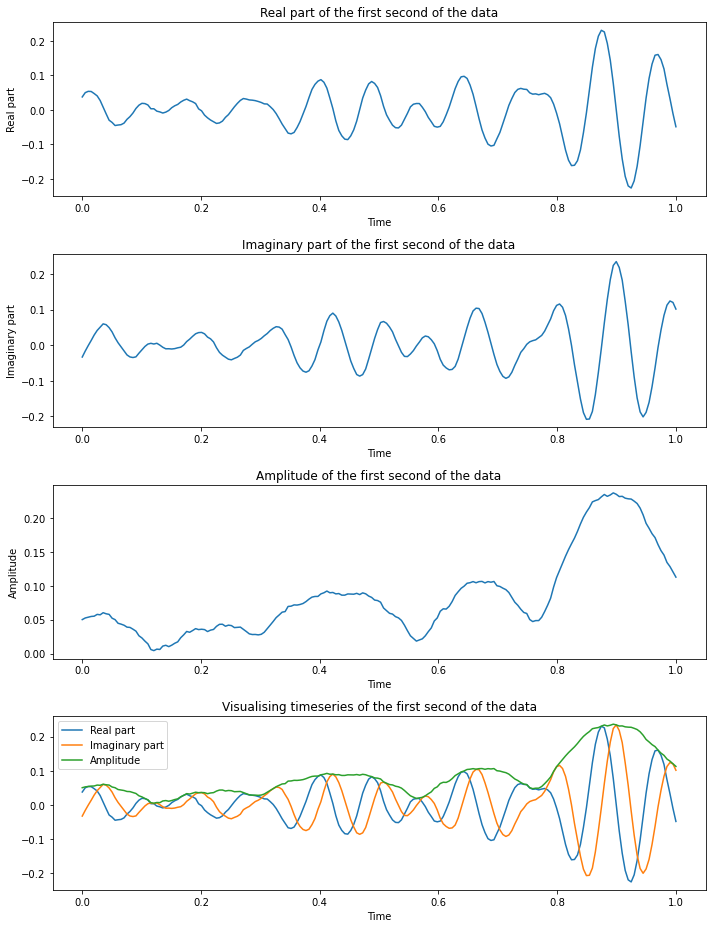

In [52]:
#YOUR CODE HERE
# Plotting the timeseries
first_second = np.linspace(0, 1, sampling_rate)
timeseries = datasim1[0, :200]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (10, 13))
# Taking real part from timeseries
real_part = timeseries.real
# Taking imaginary part from timeseries
imaginary_part = timeseries.imag
# Taking amplitude from timeseries
amplitude = np.abs(timeseries)

# Plotting real part timeseries
ax1.plot(first_second, real_part)
ax1.set_xlabel('Time')
ax1.set_ylabel('Real part')
ax1.set_title('Real part of the first second of the data')

# Plotting imaginary part timeseries
ax2.plot(first_second, imaginary_part)
ax2.set_xlabel('Time')
ax2.set_ylabel('Imaginary part')
ax2.set_title('Imaginary part of the first second of the data')

# Plotting amplitude timeseries
ax3.plot(first_second, amplitude)
ax3.set_xlabel('Time')
ax3.set_ylabel('Amplitude')
ax3.set_title('Amplitude of the first second of the data')

# Plotting all into same figure
ax4.plot(first_second, real_part)
ax4.plot(first_second, imaginary_part)
ax4.plot(first_second, amplitude)
ax4.set_xlabel('Time')
ax4.set_title('Visualising timeseries of the first second of the data')
ax4.legend(['Real part', 'Imaginary part', 'Amplitude'])

fig.tight_layout()
plt.show()

/opt/software/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '
/opt/software/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:1814: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


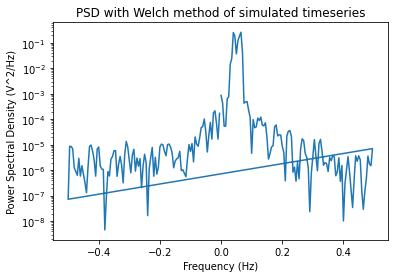

In [6]:
#YOUR CODE HERE
# Computing PSD of the simulated time series with Welch method
sample_freq, psd = signal.welch(timeseries)
fig, ax = plt.subplots()
ax.semilogy(sample_freq, psd)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power Spectral Density (V^2/Hz)')
ax.set_title('PSD with Welch method of simulated timeseries')
plt.show()

## 4. Model synchrony
In this task you need to simulate a model with 20 nodes, 100 oscillators and the same central frequency of 10Hz. The model consists of two blocks with strong inter but zero intra connections. For this task we will increase inter connection strength to 25, the same K for all nodes of 12.5 and the same central frequency of 10Hz.

Implement a function that takes the 2D analytical signal as an input (the array should have size of N_channels x N_timesamples) and computes phase synchrony for all pairs of channels. For this task we will measure synchrony using $$PLV(x,y) = |\frac{1}{N}*\sum_{i=1}^N x_n^i y_n^{i*}|$$ where N is total number ot samples, $x_n, y_n$ are normalized versions of $x, y$ defined as $x_n = \frac{x}{|x|}$ and $y_n^*$ is a conjugate version of $y_n$. 


Plot it as heatmap and include labels in your figure (see plt.imshow or plt.pcolormesh functions). You don't need to filter signals for this task, the simulated signal is in analytical form already.

In [7]:
n_nodes = 20
n_oscillators = 100
sampling_rate = 200

k_list = [12.5]*n_nodes

weight_matrix = np.zeros((n_nodes, n_nodes))
weight_matrix[:10, :10] = 25
weight_matrix[10:, 10:] = 25

node_frequencies = [10]*n_nodes
frequency_spread = 3

use_cuda = False # the server does not have a GPU so lets disable it
time = 30 # simulate 30 seconds of activity

#YOUR CODE HERE
kuramoto_2 = KuramotoFast(n_nodes = n_nodes, n_oscillators = n_oscillators, 
                             sampling_rate = sampling_rate, k_list = k_list,
                             node_frequencies = node_frequencies, frequency_spread = frequency_spread,
                             weight_matrix = weight_matrix, use_cuda = use_cuda)
datasim2 = kuramoto_2.simulate(time = time)

In [8]:
#YOUR CODE HERE
# Function to compute phase synchrony for all channels
def phase_synchrony(datasim2):
    N_channels, N_timesamples = datasim2.shape
    complex_plv = np.zeros((N_channels, N_channels))
    for i in range(N_channels):
        for j in range(N_channels):
            x = datasim2[i]/np.abs(datasim2[i])
            y = datasim2[j]/np.abs(datasim2[j])
            complex_plv[i][j] = np.abs(np.mean(x * np.conj(y)))
    return np.abs(complex_plv)

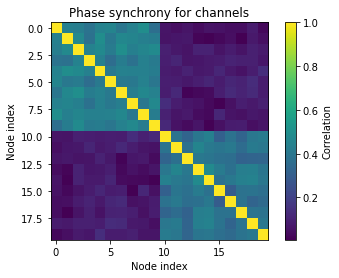

In [9]:
#YOUR CODE HERE
# Plotting the heatmap for phase synchrony
plv = phase_synchrony(datasim2)
plt.imshow(plv)
cbar = plt.colorbar()
cbar.set_label('Correlation')
plt.title('Phase synchrony for channels')
plt.xlabel('Node index')
plt.ylabel('Node index')
plt.show()

## 5. Inner coupling and a models order relationship. 
During this task we will study how does inner coupling change the model dynamics (order and signal variability).

You need to run several kuramoto simulations with k in range of $1...50$. For each simulation compute a models order (average absolute value across time) and its variability (std of absolute value across time). 

At first, visualize timeseries for several k values (1, 10 and 25). As the next step, visualize order and variability as a function of k. Because order and variability have different magnitudes it could be useful to visualize them with the same x-axis but different y-axis (see ax.twinx() function).

Don't forget to average order & variance values across nodes!

In [10]:
k_values = np.linspace(1,50,50)

n_nodes = 20
n_oscillators = 100
sampling_rate = 200

weight_matrix = np.full((n_nodes,n_nodes), 5.0)
node_frequencies = [10.0]*n_nodes
frequency_spread = 3

use_cuda = False # the server does not have a GPU so lets disable it
time = 10 # simulate 10 seconds of activity

#YOUR CODE HERE
kuramoto_sim_list= []
for k in range(1,51):
    k_list = [k]*n_nodes
    kuramoto_3 = KuramotoFast(n_nodes = n_nodes, n_oscillators = n_oscillators, 
                             sampling_rate = sampling_rate, k_list = k_list,
                             node_frequencies = node_frequencies, frequency_spread = frequency_spread,
                             weight_matrix = weight_matrix, use_cuda = use_cuda)
    kuramoto_sim_list.append(kuramoto_3.simulate(time = time))
kuramoto_list = np.array(kuramoto_sim_list)


(50, 20, 2001)


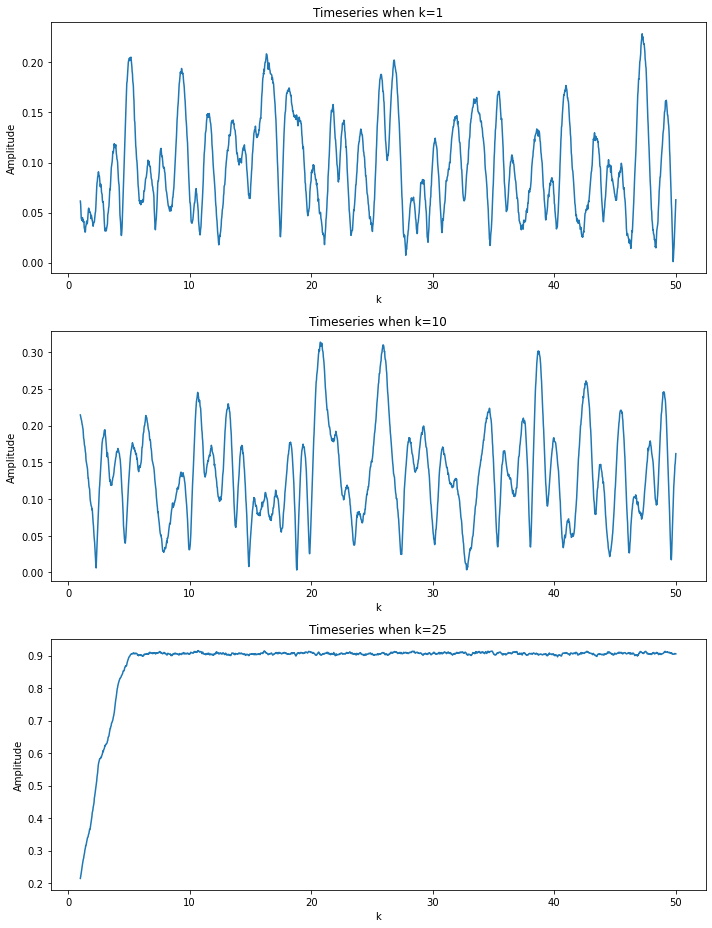

In [91]:
#YOUR CODE HERE
k_values = np.linspace(1,50,2001)
print(kuramoto_list.shape)
order = np.zeros(len(k_values))
variability = np.zeros(len(k_values))
#Computing order and variability across time
order = np.abs(kuramoto_list).mean(axis=-1)
variability = np.abs(kuramoto_list).std(axis=-1)
#Visualising timeseries
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10, 13))
timeseries1 = np.abs(kuramoto_list[0,0,:])
timeseries2 = np.abs(kuramoto_list[9,0,:])
timeseries3 = np.abs(kuramoto_list[24,0,:])
ax1.plot(k_values, timeseries1)
ax2.plot(k_values, timeseries2)
ax3.plot(k_values, timeseries3)
ax1.set_title('Timeseries when k=1')
ax2.set_title('Timeseries when k=10')
ax3.set_title('Timeseries when k=25')
ax1.set_ylabel('Amplitude')
ax2.set_ylabel('Amplitude')
ax3.set_ylabel('Amplitude')
ax1.set_xlabel('k')
ax2.set_xlabel('k')
ax3.set_xlabel('k')
plt.tight_layout()
plt.show()


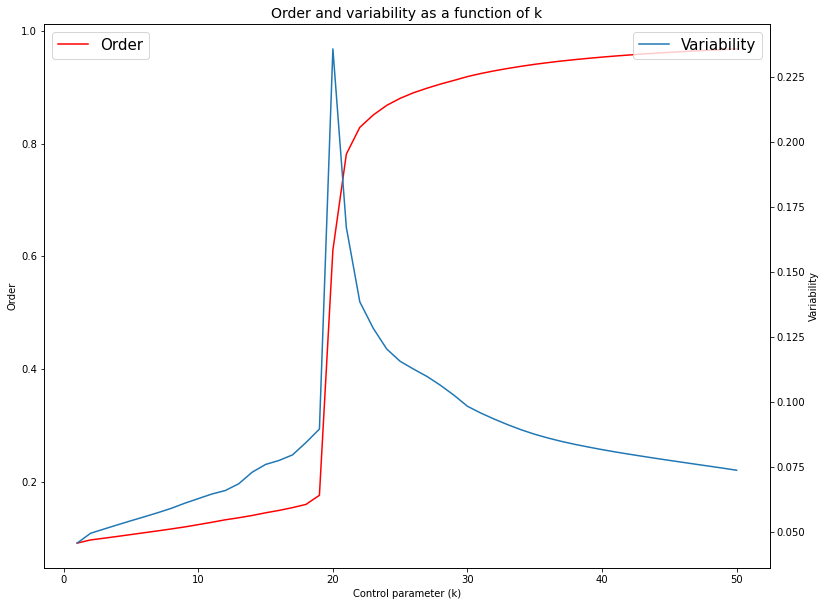

In [50]:
#Hint: ax.twinx()
#YOUR CODE HERE
    
#Visualising order and variability
ave_order_nodes = order.mean(axis=-1)
ave_vari_nodes = variability.mean(axis=-1)
fig, ax = plt.subplots(figsize=(13, 10))
ax_twinx = ax.twinx()
ax.plot(k_values, ave_order_nodes,'r-')
ax_twinx.plot(k_values, ave_vari_nodes)
ax.set_xlabel('Control parameter (k)')
ax.set_ylabel('Order')
ax_twinx.set_ylabel('Variability')
ax_twinx.legend(['Variability'], fontsize = 15)
ax.legend(['Order'], fontsize = 15)
plt.title('Order and variability as a function of k', fontsize = 14)
plt.show()

### Quarterly exam questions

#### Glossary (10 points)
Explain these terms accurately.

1. Brain criticality
2. Scale-free
3. (Neuronal) Avalanche
4. Dynamic range
5. Synchronization dynamics (vs dynamic synchronization)
6. Kuramoto model
7. Branching process
8. Order
9. Power-law correlation
10. Metastable state


#### Essay 1 (10 points)
Expected length max. 1.5 A4 pages for the whole essay (excluding figures and equations). 

1. Describe the Kuramoto model mathematically and phenomenologically (include at least the terms “phase”, “transition”,  "order", “variability”, "coupling", "control parameter", and “operating point”). What kinds of phases may the Kuramoto model operate in?
2. Compare Kuramoto, Ising, and Branching process models of criticality, and describe how criticality emerges therein. How are these models relatable to different aspects of brain activity?
3. Reflect on how “criticality” is both a phenomenon and a mechanism.


#### Essay 2 (10 points)
Expected length max. 1.5 A4 pages for the whole essay (excluding figures and equations). 

1. Describe the constructs of “(framework of) brain criticality” and "critical brain dynamics" and their operationalization in terms of mathematical metrics and empirical observables. Describe also the functional significance and implications of criticality.
2. Outline the key electrophysiological observations that support the idea of the brain operating in a critical state (including both long-range-temporal correlations and avalanche dynamics).
3. How does the framework of brain criticality link the concepts of “neuronal synchronization” and “synchronization dynamics”? What kind of individual and group level predictions on experimental observables could one make? 


#### Essay 3 (10 points)
Expected length max. 1.5 A4 pages for the whole essay (excluding figures and equations). 

Create a hypothetical in vivo experiment where the control parameter of brain criticality is manipulated and present a hypothesis on how the experimental observables should respond to this manipulation (including at least a consideration of what is the control parameter, how is it manipulated, how does the manipulation act at the synaptic level and in terms of the criticality framework, which species is being studied, and how are the data recorded and analyzed).